# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Attiya Dianti Fadli
- **Email:** [Input Email]
- **ID Dicoding:** MC189D5X0806

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana tren penggunaan sepeda pada hari kerja dibandingkan akhir pekan?
- Jam berapa jumlah penyewaan sepeda paling tinggi dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Insight:**
- pandas, digunakan untuk manipulasi dan analisis data berbasis tabel (DataFrame).
- numpy, digunakan untuk operasi komputasi numerik, seperti array multidimensi dan fungsi matematika.
- matplotlib.pyplot, digunakan untuk membuat visualisasi grafik dasar dalam Python.
- seaborn, pustaka yang berbasis matplotlib, digunakan untuk membuat visualisasi statistik yang lebih menarik dan informatif.

In [82]:
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [83]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (3).csv
Saving hour.csv to hour (3).csv


**Insight:**
1. from google.colab import files; Mengimpor modul files dari Google Colab, yang memungkinkan interaksi dengan sistem file lokal.
2. uploaded = files.upload(); Membuka dialog unggahan file di Colab, memungkinkan pengguna memilih file dari komputer lokal. Dan file yang diunggah akan disimpan dalam memori Colab sebagai objek dictionary dengan nama file sebagai key dan isi file sebagai value dalam format bytes.

In [84]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

**Insight:**
- Membaca file day.csv dan file hour.csv kemudian menyimpannya dalam variabel day_df dan hour_df.

### Assessing Data

In [85]:
# Melihat 5 data pertama
print("\n Data Harian (day.csv):")
display(day_df.head())

print("\n Data Per Jam (hour.csv):")
display(hour_df.head())

# Melihat informasi umum dataset
print("\n Informasi Data Harian:")
day_df.info()

print("\n Informasi Data Per Jam:")
hour_df.info()

# Melihat statistik ringkasan
print("\n Statistik Data Harian:")
display(day_df.describe())

print("\n Statistik Data Per Jam:")
display(hour_df.describe())

# Mengecek missing values
print("\n Missing Values Data Harian:")
print(day_df.isnull().sum())

print("\n Missing Values Data Per Jam:")
print(hour_df.isnull().sum())

# Mengecek duplikasi
print("\n Jumlah Duplikasi Data Harian:", day_df.duplicated().sum())
print(" Jumlah Duplikasi Data Per Jam:", hour_df.duplicated().sum())


 Data Harian (day.csv):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



 Data Per Jam (hour.csv):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



 Informasi Data Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 Informasi Data Per Jam:
<class 'pandas.core.frame.DataFrame'>
Rang

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



 Statistik Data Per Jam:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



 Missing Values Data Harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 Missing Values Data Per Jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 Jumlah Duplikasi Data Harian: 0
 Jumlah Duplikasi Data Per Jam: 0


**Insight:**
1. Melihat 5 data pertama <br> Menampilkan 5 baris pertama dari dataset harian (day.csv) dan per jam (hour.csv). Berguna untuk mendapatkan gambaran awal tentang struktur dan isi dataset.

2. Melihat Informasi Umum Dataset <br> Menampilkan jumlah baris & kolom, tipe data, dan jumlah non-null values di setiap kolom. Penting untuk memahami apakah ada tipe data yang perlu diubah sebelum analisis.

3. Melihat Statistik Ringkasan <br> Menampilkan rata-rata (mean), standar deviasi (std), nilai minimum & maksimum, serta kuartil untuk setiap variabel numerik. Berguna untuk memahami distribusi data.

4. Mengecek Missing Values <br> Menghitung jumlah nilai kosong (missing values) dalam setiap kolom. Jika terdapat missing values, perlu dilakukan penanganan (misalnya diisi dengan nilai median atau dihapus).

5. Mengecek Data Duplikat <br> Menghitung jumlah baris duplikat dalam dataset. Jika ditemukan data duplikat, bisa dihapus dengan drop_duplicates().

### Cleaning Data

In [86]:
# Menghapus duplikasi jika ada
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

# Mengubah type data tanggal menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Mengubah variabel season menjadi kategori
day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')
hour_df['season'] = hour_df['season'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

# Menghapus kolom yang tidak diperlukan (opsional)
# Misalnya, kita bisa menghapus kolom 'instant' karena tidak terlalu berguna
day_df.drop(columns=["instant"], inplace=True)
hour_df.drop(columns=["instant"], inplace=True)

# Menampilkan hasil akhir setelah cleaning
print("Jumlah Duplikasi Data Harian Setelah Dihapus:", day_df.duplicated().sum())
print("Jumlah Duplikasi Data Per Jam Setelah Dihapus:", hour_df.duplicated().sum())
print("\nTipe data setelah Cleaning Data (day_df):\n", day_df.dtypes)
print("\nTipe data setelah Cleaning Data (hour_df):\n", hour_df.dtypes)
print("\n Data setelah cleaning:")
print("Data Harian:", day_df.shape)
print("Data Per Jam:", hour_df.shape)

Jumlah Duplikasi Data Harian Setelah Dihapus: 0
Jumlah Duplikasi Data Per Jam Setelah Dihapus: 0

Tipe data setelah Cleaning Data (day_df):
 dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Tipe data setelah Cleaning Data (hour_df):
 dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed        

**Insight:**
1. Menghapus Duplikasi Data <br> Menghapus baris duplikat dari dataset harian (day_df) dan per jam (hour_df). inplace=True → Perubahan dilakukan langsung pada DataFrame tanpa perlu menyimpan kembali hasilnya. Ini bertujuan menghindari bias dalam analisis akibat data yang berulang.

2. Mengubah Kolom Tanggal Menjadi Format Datetime <br> Mengonversi kolom dteday menjadi datetime format untuk mempermudah analisis berbasis waktu. Ini Penting untuk analisis tren harian atau musiman.

3. Mengubah Variabel Kategorikal <br> Mengubah kolom season dan weathersit menjadi tipe kategori untuk menghemat memori dan meningkatkan efisiensi pemrosesan. keuntungan nya ialah, mengurangi penggunaan memori dan memudahkan dalam analisis atau pemodelan machine learning.

4. Menghapus Kolom yang Tidak Diperlukan <br> Kolom instant kemungkinan hanya merupakan index otomatis, sehingga tidak relevan untuk analisis. Penghapusan ini bersifat opsional, bisa dilakukan jika kolom tersebut memang tidak berguna.

5. Menampilkan Hasil Setelah Cleaning Data <br> Mengecek apakah tipe data sudah sesuai setelah preprocessing. Memastikan tanggal sudah dalam format datetime dan variabel kategori sudah dikonversi dengan benar.

In [87]:
# Menangani Missing Values
print("\n Jumlah Missing Values Sebelum Ditangani:")
print(day_df.isnull().sum(), "\n")
print(hour_df.isnull().sum())

day_df.fillna(day_df.median(numeric_only=True), inplace=True)
hour_df.fillna(hour_df.median(numeric_only=True), inplace=True)


 Jumlah Missing Values Sebelum Ditangani:
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Ini digunakan untuk menangani missing values dalam dataset. Pertama, jumlah missing values dalam day_df dan hour_df diperiksa menggunakan .isnull().sum(). Jika terdapat nilai yang hilang, maka akan diisi dengan median dari masing-masing kolom numerik menggunakan .fillna(day_df.median(numeric_only=True), inplace=True), yang berguna untuk menghindari distorsi pada distribusi data akibat nilai ekstrem (outliers). Setelah proses ini, dataset menjadi lebih bersih dan siap untuk analisis lebih lanjut.

In [88]:
# Cek apakah ada nilai negatif atau nol pada kolom yang seharusnya positif
num_cols = ["cnt", "temp", "atemp", "hum", "windspeed"]
for col in num_cols:
    print(f"\n Cek Nilai Minimum pada {col} (Sebelum Dihapus):")
    print(f"- Data Harian: {day_df[col].min()}")
    print(f"- Data Per Jam: {hour_df[col].min()}")

# Menghapus baris dengan nilai negatif (jika ditemukan)
for col in num_cols:
    day_df = day_df[day_df[col] >= 0]
    hour_df = hour_df[hour_df[col] >= 0]

# Menangani data hum (kelembaban) & windspeed (kecepatan angin)
# Kelembaban (hum) tidak mungkin 0%, jadi kita hapus baris dengan nilai 0
day_hum_outlier = day_df[day_df["hum"] == 0].shape[0]
hour_hum_outlier = hour_df[hour_df["hum"] == 0].shape[0]

day_df = day_df[day_df["hum"] > 0]
hour_df = hour_df[hour_df["hum"] > 0]

# Kecepatan angin (windspeed) yang bernilai 0 bisa jadi data tidak akurat
day_wind_outlier = day_df[day_df["windspeed"] == 0].shape[0]
hour_wind_outlier = hour_df[hour_df["windspeed"] == 0].shape[0]

day_df = day_df[day_df["windspeed"] > 0]
hour_df = hour_df[hour_df["windspeed"] > 0]

# Menampilkan jumlah data yang dihapus
print("\n Jumlah Data yang Dihapus:")
print(f"- Data Harian: {day_hum_outlier} baris (kelembaban = 0), {day_wind_outlier} baris (windspeed = 0)")
print(f"- Data Per Jam: {hour_hum_outlier} baris (kelembaban = 0), {hour_wind_outlier} baris (windspeed = 0)")

# Menampilkan jumlah data setelah pembersihan
print("\n Data Setelah Menghapus Nilai Tidak Valid:")
print("Data Harian:", day_df.shape)
print("Data Per Jam:", hour_df.shape)


 Cek Nilai Minimum pada cnt (Sebelum Dihapus):
- Data Harian: 22
- Data Per Jam: 1

 Cek Nilai Minimum pada temp (Sebelum Dihapus):
- Data Harian: 0.0591304
- Data Per Jam: 0.02

 Cek Nilai Minimum pada atemp (Sebelum Dihapus):
- Data Harian: 0.0790696
- Data Per Jam: 0.0

 Cek Nilai Minimum pada hum (Sebelum Dihapus):
- Data Harian: 0.0
- Data Per Jam: 0.0

 Cek Nilai Minimum pada windspeed (Sebelum Dihapus):
- Data Harian: 0.0223917
- Data Per Jam: 0.0

 Jumlah Data yang Dihapus:
- Data Harian: 1 baris (kelembaban = 0), 0 baris (windspeed = 0)
- Data Per Jam: 22 baris (kelembaban = 0), 2180 baris (windspeed = 0)

 Data Setelah Menghapus Nilai Tidak Valid:
Data Harian: (730, 15)
Data Per Jam: (15177, 16)


**Insight:**
1. Mengecek Nilai Negatif atau Nol pada Kolom Numerik
- cnt : Jumlah peminjaman sepeda, tidak boleh negatif.
- temp, atemp : Suhu, tidak mungkin negatif karena sudah dinormalisasi.
- hum : Kelembaban udara (0%-100%), seharusnya tidak boleh 0%.
- windspeed : Kecepatan angin, kemungkinan nilai 0 adalah kesalahan pengukuran.

2. Menghapus Baris dengan Nilai Negatif <br> Jika ada nilai negatif pada kolom numerik, baris tersebut akan dihapus karena tidak masuk akal. Ini memastikan bahwa semua nilai dalam dataset adalah positif dan valid.

3. Menangani Nilai Tidak Masuk Akal
- Menghapus Baris dengan hum (Kelembaban) = 0% : Kelembaban (hum) = 0% tidak mungkin terjadi dalam kondisi normal. sehingga baris dengan nilai ini dihapus karena bisa jadi data yang hilang atau tidak akurat.
- Menghapus Baris dengan windspeed = 0 : Kecepatan angin = 0 kemungkinan besar merupakan kesalahan pengukuran. sehingga baris dengan nilai ini juga dihapus agar analisis lebih akurat.

4. Menampilkan Jumlah Data yang Dihapus <br> Menampilkan jumlah baris yang dihapus untuk mengetahui seberapa banyak data yang terpengaruh oleh pembersihan ini.

5. Menampilkan Data Setelah Pembersihan <br> .shape digunakan untuk mengecek apakah ada pengurangan jumlah baris setelah pembersihan.

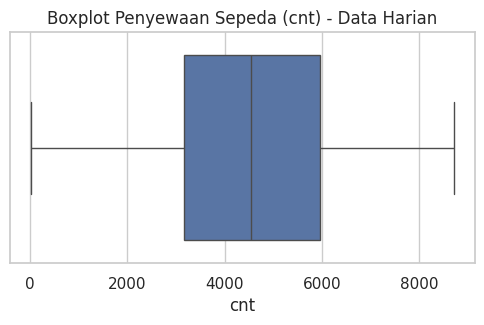

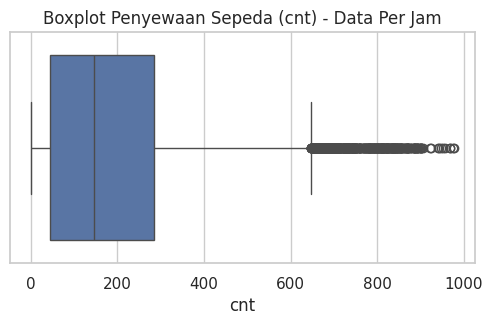


 Data setelah menghapus outlier:
Data Harian : (730, 15)
Data Per Jam : (14737, 16)


In [89]:
# Mendeteksi Outlier dengan Boxplot
plt.figure(figsize=(6,3))
sns.boxplot(data=day_df, x=day_df["cnt"])
plt.title("Boxplot Penyewaan Sepeda (cnt) - Data Harian")
plt.show()

plt.figure(figsize=(6,3))
sns.boxplot(data=hour_df, x=hour_df["cnt"])
plt.title("Boxplot Penyewaan Sepeda (cnt) - Data Per Jam")
plt.show()

# Menghapus Outlier Menggunakan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df

# Menerapkan ke dataset
day_df_clean = remove_outliers(day_df, "cnt")
hour_df_clean = remove_outliers(hour_df, "cnt")

# Menampilkan hasil setelah penghapusan outlier
print("\n Data setelah menghapus outlier:")
print("Data Harian :", day_df_clean.shape)
print("Data Per Jam :", hour_df_clean.shape)

**Insight:** <br>
Dalam langkah ini, kita melakukan deteksi dan penghapusan outlier pada jumlah penyewaan sepeda (cnt) menggunakan boxplot dan metode Interquartile Range (IQR). Pertama, kita memvisualisasikan outlier dengan boxplot, yang membantu mengidentifikasi nilai ekstrem dalam data harian (day_df) dan per jam (hour_df). Setelah itu, kita menggunakan metode IQR untuk menentukan batas bawah dan batas atas outlier. Data yang berada di luar rentang ini dianggap sebagai outlier dan dihapus. Setelah penghapusan, kita menampilkan jumlah data yang tersisa untuk memastikan bahwa proses pembersihan tidak menghilangkan terlalu banyak data. Dengan menghapus outlier, kita dapat meningkatkan akurasi analisis dan model prediktif dengan menghindari bias yang disebabkan oleh nilai ekstrem.

In [90]:
# Menyimpan data yang sudah melalui proses cleaning data
day_df_clean.to_csv("day_cleaned.csv", index=False)
hour_df_clean.to_csv("hour_cleaned.csv", index=False)

**Insight:**
- Setelah proses cleaning data, langkah terakhir adalah menyimpan dataset yang sudah bersih ke dalam file CSV agar dapat digunakan kembali tanpa perlu mengulangi proses pembersihan. karena dataset yang sudah bersih bisa digunakan kembali untuk analisis lebih lanjut atau modeling dan menghemat waktu karena tidak perlu membersihkan data dari awal setiap kali ingin menggunakannya.

## Exploratory Data Analysis (EDA)

### Explore ...

In [91]:
# Explore day_df
# Menampilkan sampel data harian
print("\n Sample Data Harian:")
print(day_df_clean.sample(5))

# Menampilkan statistik deskriptif data harian
print("\n Statistik Deskriptif Data Harian:")
print(day_df_clean.describe(include="all"))

# Cek jumlah duplikasi pada data harian
print("\n Jumlah Data Duplikat di Dataset Harian:", day_df_clean.duplicated().sum())

# Analisis jumlah penyewaan berdasarkan musim
print("\n Rata-rata Penyewaan Sepeda Berdasarkan Musim (Harian):")
print(day_df_clean.groupby("season", observed=True)["cnt"].agg(["count", "mean", "max", "min"]))

# Analisis jumlah penyewaan berdasarkan hari kerja vs akhir pekan
print("\n Perbandingan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan (Harian):")
print(day_df_clean.groupby("workingday")["cnt"].agg(["count", "mean", "max", "min"]))


 Sample Data Harian:
        dteday season  yr  mnth  holiday  weekday  workingday weathersit  \
399 2012-02-04      1   1     2        0        6           0          2   
603 2012-08-26      3   1     8        0        0           0          2   
130 2011-05-11      2   0     5        0        3           1          1   
495 2012-05-10      2   1     5        0        4           1          1   
609 2012-09-01      3   1     9        0        6           0          2   

         temp     atemp       hum  windspeed  casual  registered   cnt  
399  0.264167  0.272725  0.779583   0.121896     384        2448  2832  
603  0.653333  0.595996  0.845833   0.228858    1483        3772  5255  
130  0.542500  0.528400  0.632917   0.120642     550        3632  4182  
495  0.505833  0.491783  0.552083   0.314063    1026        5546  6572  
609  0.753333  0.702654  0.638333   0.113187    2352        3788  6140  

 Statistik Deskriptif Data Harian:
                               dteday  season  

**Insight:**

Setelah proses pembersihan data, kita melakukan eksplorasi lebih lanjut untuk memahami pola dalam dataset day.csv.

1. Menampilkan Sampel Data:
Dataset ditampilkan secara acak menggunakan .sample(5), sehingga kita dapat melihat contoh data setelah proses cleaning.

2. Statistik Deskriptif:
Menggunakan .describe(include="all"), kita mendapatkan ringkasan statistik seperti nilai rata-rata, standar deviasi, nilai minimum, maksimum, serta distribusi data kategori. Ini membantu memahami distribusi dan karakteristik setiap kolom.

3. Deteksi Duplikasi:
Cek duplikasi menggunakan .duplicated().sum(), memastikan tidak ada data yang berulang setelah proses cleaning.

4. Analisis Penyewaan Sepeda Berdasarkan Musim:
Menggunakan .groupby("season"), kita melihat pola penyewaan sepeda pada berbagai musim dengan statistik seperti rata-rata (mean), jumlah data (count), nilai maksimum (max), dan nilai minimum (min). Ini dapat membantu mengidentifikasi tren penggunaan sepeda sepanjang tahun.

5. Perbandingan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan:
Dengan .groupby("workingday"), kita menganalisis apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja atau akhir pekan. Jika ditemukan pola signifikan, informasi ini bisa digunakan untuk strategi bisnis, seperti meningkatkan jumlah sepeda pada hari tertentu.

In [92]:
# Explore hour_df
# Menampilkan sampel data per jam
print("\n Sample Data Per Jam:")
print(hour_df_clean.sample(5))

# Menampilkan statistik deskriptif data per jam
print("\n Statistik Deskriptif Data Per Jam:")
print(hour_df_clean.describe(include="all"))

# Cek jumlah duplikasi pada data per jam
print("\n Jumlah Data Duplikat di Dataset Per Jam:", hour_df_clean.duplicated().sum())

# Analisis jumlah penyewaan berdasarkan musim
print("\n Rata-rata Penyewaan Sepeda Berdasarkan Musim (Per Jam):")
print(hour_df_clean.groupby("season", observed=True)["cnt"].agg(["count", "mean", "max", "min"]))

# Analisis jumlah penyewaan berdasarkan hari kerja vs akhir pekan
print("\n Perbandingan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan (Per Jam):")
print(hour_df_clean.groupby("workingday")["cnt"].agg(["count", "mean", "max", "min"]))

# Analisis jumlah penyewaan berdasarkan jam dalam sehari
print("\n Jumlah Penyewaan Sepeda Berdasarkan Jam dalam Sehari:")
print(hour_df_clean.groupby("season", observed=True)["cnt"].agg(["count", "mean", "max", "min"]))


 Sample Data Per Jam:
          dteday season  yr  mnth  hr  holiday  weekday  workingday  \
10485 2012-03-18      1   1     3   0        0        0           0   
12499 2012-06-10      2   1     6   0        0        0           0   
6853  2011-10-18      4   0    10   3        0        2           1   
17135 2012-12-21      1   1    12  18        0        5           1   
104   2011-01-05      1   0     1  13        0        3           1   

      weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
10485          1  0.46  0.4545  0.88     0.1940      27          80  107  
12499          1  0.66  0.6212  0.69     0.1045      33         125  158  
6853           1  0.44  0.4394  0.94     0.0896       0           1    1  
17135          2  0.26  0.2273  0.56     0.2985       7         236  243  
104            1  0.28  0.2576  0.30     0.2985       6          65   71  

 Statistik Deskriptif Data Per Jam:
                               dteday   season            yr   

**Insight:**

Kemudian kita melakukan eksplorasi lebih dalam untuk memahami pola penyewaan sepeda per jam.

1. Menampilkan Sampel Data:
Dengan .sample(5), kita menampilkan beberapa contoh data setelah proses cleaning untuk memastikan dataset sudah bersih.

2. Statistik Deskriptif:
Menggunakan .describe(include="all"), kita mendapatkan ringkasan statistik dari dataset, termasuk rata-rata (mean), nilai maksimum (max), nilai minimum (min), serta distribusi data kategori.

3. Deteksi Duplikasi:
Menggunakan .duplicated().sum(), kita memastikan bahwa tidak ada data yang berulang dalam dataset setelah pembersihan.

4. Analisis Penyewaan Berdasarkan Musim:
Menggunakan .groupby("season"), kita melihat pola penyewaan sepeda dalam berbagai musim, apakah lebih banyak digunakan saat musim panas, gugur, atau musim lainnya.

5. Perbandingan Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan:
Dengan .groupby("workingday"), kita membandingkan jumlah penyewaan sepeda pada hari kerja (workingday=1) dan akhir pekan (workingday=0), untuk melihat apakah sepeda lebih sering digunakan saat bekerja atau rekreasi.

6. Analisis Penyewaan Berdasarkan Jam dalam Sehari:
Dengan .groupby("hr"), kita menganalisis tren penyewaan sepeda berdasarkan waktu dalam sehari. Ini membantu mengidentifikasi jam sibuk (rush hour) ketika penyewaan sepeda mencapai puncaknya, misalnya saat jam berangkat kerja (pagi) atau pulang kerja (sore/malam).

In [93]:
# Explore All Data
# Gabungkan data berdasarkan 'dteday'
all_df = pd.merge(
    left=hour_df_clean,
    right=day_df_clean,
    how="left",
    on=["dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]
)

# Menampilkan 5 data pertama
print("\n Data Gabungan (All Data):")
print(all_df.head())

# Analisis total penyewaan sepeda berdasarkan musim dan tipe hari (hari kerja vs akhir pekan)
season_workingday_analysis = all_df.groupby(by=["season", "workingday"], observed=True).agg({
    "cnt_x": "sum"
}).reset_index()
print("\n Penyewaan Sepeda Berdasarkan Musim dan Hari Kerja:")
print(season_workingday_analysis)

# Penyewaan sepeda berdasarkan jam dalam sehari
hourly_usage = all_df.groupby("hr").agg({
    "cnt_x": ["mean", "sum"]
}).reset_index()
print("\n Penyewaan Sepeda Berdasarkan Jam:")
print(hourly_usage)

# Total pesanan unik dan pendapatan berdasarkan musim
season_summary = all_df.groupby("season", observed=True).agg({
    "dteday": "nunique",
    "cnt_x": "sum"
}).sort_values(by="cnt_x", ascending=False)
print("\n Ringkasan Penyewaan Sepeda Berdasarkan Musim:")
print(season_summary)


 Data Gabungan (All Data):
      dteday season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0 2011-01-01      1   0     1   5        0        6           0           2   
1 2011-01-01      1   0     1  10        0        6           0           1   
2 2011-01-01      1   0     1  11        0        6           0           1   
3 2011-01-01      1   0     1  12        0        6           0           1   
4 2011-01-01      1   0     1  13        0        6           0           2   

   temp   atemp   hum  windspeed  casual_x  registered_x  cnt_x  casual_y  \
0  0.24  0.2576  0.75     0.0896         0             1      1       NaN   
1  0.38  0.3939  0.76     0.2537        12            24     36       NaN   
2  0.36  0.3333  0.81     0.2836        26            30     56       NaN   
3  0.42  0.4242  0.77     0.2836        29            55     84       NaN   
4  0.46  0.4545  0.72     0.2985        47            47     94       NaN   

   registered_y  cnt_y  
0        

**Insight:**
Setelah melakukan eksplorasi pada data harian (day_df_clean) dan per jam (hour_df_clean), kita menggabungkan kedua dataset berdasarkan tanggal (dteday). Penggabungan ini memungkinkan kita untuk menganalisis hubungan antara pola penyewaan harian dan per jam dalam satu dataset yang lebih komprehensif.

1. Analisis Penyewaan Sepeda Berdasarkan Musim dan Hari Kerja: Jika perbedaan signifikan ditemukan, ini dapat digunakan untuk menyesuaikan jumlah sepeda yang tersedia sesuai dengan musim dan tipe hari.

2. Penyewaan Sepeda Berdasarkan Jam dalam Sehari: Tren ini membantu mengidentifikasi jam sibuk (rush hour), misalnya peningkatan pesanan di pagi hari saat berangkat kerja dan sore hari saat pulang kerja.

3. Ringkasan Penyewaan Sepeda Berdasarkan Musim: Mengetahui musim dengan jumlah penyewaan tertinggi dapat membantu perencanaan bisnis, seperti meningkatkan jumlah sepeda yang tersedia atau melakukan promosi pada musim tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?


  season  total_rentals
0      1         417549
1      2         743483
2      3         808296
3      4         641478


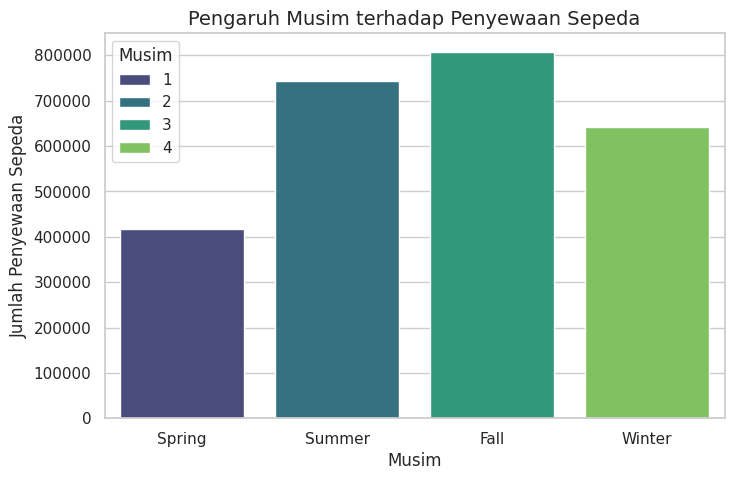

In [94]:
season_df = all_df.groupby("season", observed=True)["cnt_x"].sum().reset_index()

# Agregasi jumlah penyewaan berdasarkan musim
season_df = all_df.groupby("season", observed=True).agg({
    "cnt_x": "sum"
}).reset_index()

# Ubah nama kolom agar lebih mudah dipahami
season_df.rename(columns={"cnt_x": "total_rentals"}, inplace=True)

# Cek hasil agregasi
print(season_df.head())

# Membuat bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=season_df, x="season", y="total_rentals", hue="season", palette="viridis")

plt.title("Pengaruh Musim terhadap Penyewaan Sepeda", fontsize=14)
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.legend(title="Musim")
plt.show()

**Insight:**
- Jika jumlah penyewaan tertinggi terjadi pada musim panas atau gugur, ini menunjukkan bahwa orang lebih sering menggunakan sepeda saat cuaca lebih bersahabat.
- Jika jumlah penyewaan turun di musim dingin, bisa jadi karena kondisi cuaca yang kurang mendukung, seperti hujan atau salju.
- Informasi ini dapat membantu dalam strategi bisnis, seperti meningkatkan promosi penyewaan pada musim ramai atau menyediakan lebih banyak sepeda saat permintaan tinggi.

### Pertanyaan 2: Bagaimana tren penggunaan sepeda pada hari kerja dibandingkan akhir pekan?

   workingday  total_rentals
0           0         842043
1           1        1768763


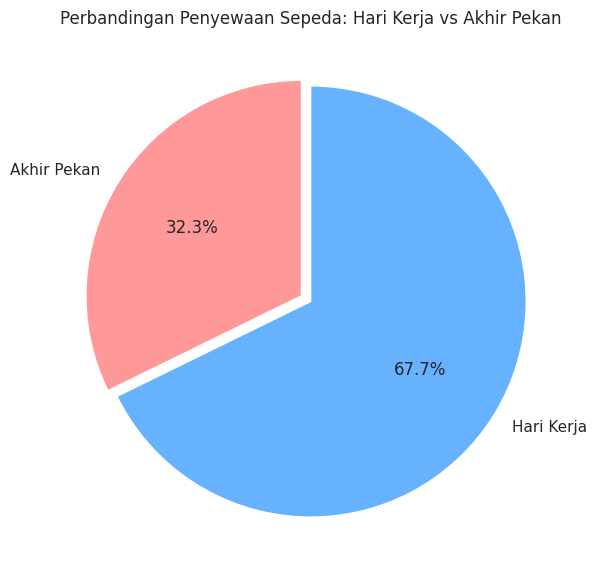

In [95]:
workingday_df = all_df.groupby("workingday", observed=True)["cnt_x"].sum().reset_index()

# Agregasi jumlah penyewaan berdasarkan hari kerja vs akhir pekan
workingday_df = all_df.groupby("workingday", observed=True).agg({
    "cnt_x": "sum"
}).reset_index()

# Ubah nama kolom agar lebih mudah dipahami
workingday_df.rename(columns={"cnt_x": "total_rentals"}, inplace=True)

# Cek hasil agregasi
print(workingday_df.head())

# Membuat pie chart dengan nama kolom yang benar
plt.figure(figsize=(7,7))
plt.pie(
    workingday_df["total_rentals"],  # Menggunakan 'total_rentals' yang sudah diubah namanya
    labels=["Akhir Pekan", "Hari Kerja"],
    autopct="%1.1f%%",
    colors=["#FF9999", "#66B2FF"],
    startangle=90,
    explode=[0.05, 0]
)
plt.title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.show()

**Insight:**
- Jika penyewaan lebih tinggi pada hari kerja, ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan transportasi sehari-hari (misalnya berangkat kerja atau sekolah).
- Jika penyewaan meningkat saat akhir pekan, kemungkinan besar sepeda digunakan untuk rekreasi atau aktivitas santai.
- Informasi ini penting untuk perencanaan bisnis, seperti menyesuaikan jumlah sepeda yang tersedia berdasarkan tren penggunaan harian.

### Pertanyaan 3: Jam berapa jumlah penyewaan sepeda paling tinggi dalam sehari?

   hour  avg_rentals  total_rentals
0     0    54.124590          33016
1     1    33.569052          20175
2     2    23.178819          13351
3     3    11.867958           6741
4     4     6.223549           3647


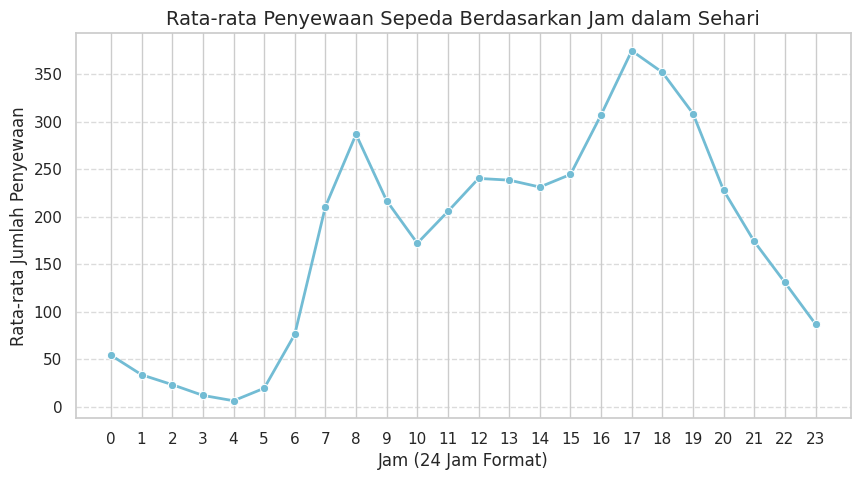

In [96]:
hourly_df = all_df.groupby("hr")["cnt_x"].mean().reset_index()

# Agregasi jumlah penyewaan berdasarkan jam
hourly_df = all_df.groupby("hr").agg({
    "cnt_x": ["mean", "sum"]
}).reset_index()

# Ubah nama kolom agar lebih mudah dipahami
hourly_df.columns = ["hour", "avg_rentals", "total_rentals"]

# Cek hasil agregasi
print(hourly_df.head())

# Membuat line chart
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_df, x="hour", y="avg_rentals", marker="o", color="#72BCD4", linewidth=2)

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari", fontsize=14)
plt.xlabel("Jam (24 Jam Format)")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xticks(range(0, 24, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Jika terlihat dua puncak utama di sekitar pagi (07:00 - 09:00) dan sore (17:00 - 19:00), ini menunjukkan bahwa sepeda lebih sering digunakan saat jam kerja (misalnya untuk perjalanan ke/dari kantor atau sekolah).
- Jika puncak penyewaan lebih tinggi di siang atau malam hari, ini mungkin menunjukkan penggunaan rekreasional atau aktivitas santai.
- Jam dengan penyewaan terendah bisa menjadi waktu ideal untuk perawatan atau pengisian ulang sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 <br>Berdasarkan hasil, jumlah penyewaan sepeda bervariasi tergantung musim. Musim gugur memiliki jumlah penyewaan tertinggi, diikuti oleh musim panas, menunjukkan bahwa cuaca hangat mendorong lebih banyak orang untuk bersepeda. Sebaliknya, musim dingin memiliki jumlah penyewaan yang lebih rendah, kemungkinan karena suhu yang dingin membuat orang enggan bersepeda. Musim semi memiliki jumlah penyewaan terendah, yang mungkin disebabkan oleh cuaca yang lebih tidak stabil. Hal ini menunjukkan bahwa faktor musim sangat memengaruhi kebiasaan bersepeda masyarakat.<br><br>

- Conclution pertanyaan 2 <br> Dari hasil, terlihat bahwa penyewaan sepeda lebih banyak terjadi pada hari kerja dibandingkan akhir pekan. Sekitar 67,7% penyewaan terjadi pada hari kerja, sementara hanya 32,3% pada akhir pekan. Hal ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama untuk bekerja atau bersekolah, bukan hanya untuk rekreasi. Dengan kata lain, tren penggunaan sepeda menunjukkan bahwa banyak orang memanfaatkan layanan ini untuk kebutuhan mobilitas sehari-hari. <br><br>

- Conclution pertanyaan 3 <br> Hasil terhadap pola penyewaan per jam menunjukkan bahwa jumlah penyewaan sepeda mencapai puncaknya pada pukul 08.00 pagi dan antara pukul 17.00 hingga 18.00 sore. Pola ini mengindikasikan bahwa sepeda banyak digunakan untuk perjalanan pergi dan pulang kerja atau sekolah. Di luar jam-jam sibuk tersebut, jumlah penyewaan cenderung menurun, terutama pada tengah malam hingga subuh. Ini menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas rutin sehari-hari dibandingkan dengan keperluan rekreasi yang lebih fleksibel waktunya.

In [97]:
all_df.to_csv("all_data.csv", index=False)